### import libraries

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
from sklearn.linear_model import LinearRegression

In [2]:
folder = "/Users/cdesio/UoB/DARK-LANA/Dark/Field_5x5/"

In [3]:
fnames = sorted(os.listdir(folder))[1:]

In [9]:
img = imread(os.path.join(folder, fnames[1]))

In [10]:
init_ls =  checkerboard_level_set(img.shape, 5)
ls = morphological_chan_vese(img, 20, init_level_set=init_ls)#, smoothing=5)

In [11]:
contour = [np.nonzero(ls)[0], np.nonzero(ls)[1]]

In [12]:
cut = ls[2000:2400,645:1600]
max_cut = np.max(np.where(cut)[1])
x_old = list()
y_old=list()
for i in range(max_cut):
    if np.any(np.where(cut)[1][np.where(cut)[1]==i]):
        x_old.append(i)
        y_old.append(np.max(np.where(cut)[0][np.where(cut)[1]==i]))

(300, 0)

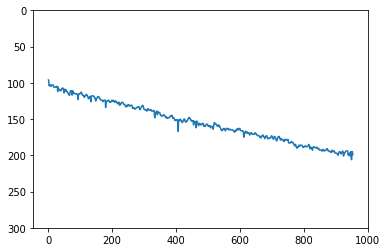

In [13]:
plt.plot(x_old,y_old)
plt.ylim(300,0)
#plt.xlim(0,945)

In [14]:
x_old =np.asarray(x_old).reshape(-1,1)

model = LinearRegression()
model.fit(x_old, y_old)

r_sq = model.score(x_old, y_old)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)



coefficient of determination: 0.9918155533665455
intercept: 106.53507719982011
slope: [0.10020892]


In [15]:
np.rad2deg(np.arctan(model.coef_))

array([5.72244465])

In [16]:
a = np.argwhere(cut)

In [17]:
def groupby(X, y):
    y = np.asarray(y)
    X = np.asarray(X)
    y_uniques = np.unique(y)
    y_out = [np.max(X[y==yi]) for yi in y_uniques]
    return y_uniques, y_out

In [18]:
x_new, y_new = groupby(a[:,0],a[:,1])

(300, 0)

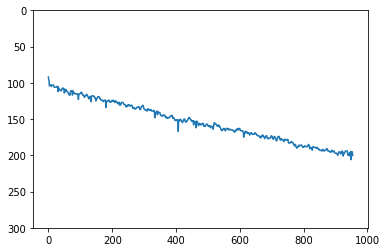

In [19]:
plt.plot(x_new,y_new)
plt.ylim(300,0)
#plt.xlim(0,945)

In [20]:
x_new =np.asarray(x_new).reshape(-1,1)

model = LinearRegression()
model.fit(x_new, y_new)

r_sq = model.score(x_new, y_new)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)




coefficient of determination: 0.9915898304429082
intercept: 106.47874871300579
slope: [0.10029042]


In [21]:
np.rad2deg(np.arctan(model.coef_))

array([5.72706757])